# Analysis of chess openings and analysis of Jan Krzysztof Duda's openings and games
Analysis of Jan Krzysztof Duda's games is based on the 'chess' library, typical for chess analysis. The following libraries are also used: numpy, pandas, seaborn, matplotlib.pyplot, and pyarrow.

To analyze the games was imported a file with the extension *.parqet, describing 1 971 319 professional chess games. Among them are 1729 games played by Duda.

After importing the data and libraries, characteristics will be presented for the entire dataset and then only for the Polish player. In the context of analysis, the openings that he played are of interest, depending on the years, or the number of wins/losses.

An additional step is the analysis of PGN files of two games in which the Duda lost to players with the largest ELO difference compared to him. For this purpose, the chess.pgn library and the stockfish engine are used.

A more detailed description of the steps will be inside the code.

In [1]:
# chess library
!pip install chess

In [2]:
# library to saving/reading games files
!pip install pyarrow

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import chess
import pyarrow

pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [2]:
pd.options.mode.chained_assignment = None 

In [3]:
# import data
df = pd.read_parquet(r'C:\Users\sebas\Downloads\archive (9)\twic_master.parquet')

In [5]:
df.head(20)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476,1503014,2527,2835,"Pelikan, Chelyabinsk variation",GM,GM,None,None,None,None,None,None,None,None,None
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192,4611500,2746,2483,None,GM,GM,None,None,None,None,None,None,None,None,None
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045,24101605,2620,2709,"Canal-Sokolsky attack, 3...Bd7",GM,GM,None,None,None,None,None,None,None,None,None
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737,4115341,2719,2592,None,GM,GM,None,None,None,None,None,None,None,None,None
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507,13300474,2637,2765,"two knights, Suttles variation",GM,GM,None,None,None,None,None,None,None,None,None
5,1260,"Mamedyarov,S","Gasanov,E",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. d4 f5 2. c4 Nf6 3. Nc3 e6 4. e3 b6 5. d5 Bd...,St Petersburg RUS,False,1.6,A85,Dutch with c4 & Nc3,13401319,14104466,2817,2499,None,GM,GM,None,None,None,None,None,None,None,None,None
6,1260,"Gabrielian,A",Wang Hao,2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 h6 5. O-O...,St Petersburg RUS,False,1.7,C55,Two knights defence (Modern bishop's opening),4131002,8602883,2499,2730,None,GM,GM,None,None,None,None,None,None,None,None,None
7,1260,"Karjakin,Sergey","Yilmaz,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,St Petersburg RUS,False,1.8,B90,Sicilian,14109603,6302718,2753,2636,"Najdorf, Byrne (English) attack",GM,GM,None,None,None,None,None,None,None,None,None
8,1260,"Goganov,A","Nepomniachtchi,I",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. d4 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. e...,St Petersburg RUS,False,1.9,D85,Gruenfeld,24109959,4168119,2612,2763,exchange variation,GM,GM,None,None,None,None,None,None,None,None,None
9,1260,"Harikrishna,P","Hakobyan,Aram",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 Nf6 5. d3...,St Petersburg RUS,False,1.10,C53,Giuoco Piano,5007003,13306677,2725,2545,None,GM,GM,None,None,None,None,None,None,None,None,None


### What is inside?
'Twic_number' is a identification number corresponding to events and dates, there are 536 twic_numbers.<br>
'White' and 'Black' - names of players played with white or black.<br>
'Date', 'EventDate' - 'EventDate' won't be needed in analysis, I will delete some columns later.<br>
'Event' - event on which game was played.<br>
'Result' - in chess result can be: 1-0, 0-1, 1/2-1/2, there are some results in different format, I will just delete it.<br>
'Mainline_moves' - moves played in the game. I don't need this column in parquet analysis, but will be necessary for the PGNs analysis.<br>
'Site' - Site of game. Can be offline site like St Petersburg RUS, or chess.com, lichess.org etc. for online games.<br>
'Online' - True or False value, simplified 'Site', where is word 'INT' for online games.<br>
'Round' - Round of event. <br>
'ECO' and 'Opening' - both columns correspond to openings. 'Opening' is for string values, 'ECO' is a reference from 'The Encyclopaedia of Chess Openings' describing the state of opening theory in chess. To more advanced analysis is better ECO, but for my purposes 'Opening' column is enough.<br>
'WhiteFideId', 'BlackFideId' - don't need, when I have also names.<br>
'WhiteElo', 'BlackElo' - Elo rating system calculating the relative skill levels of players. The biggest ELO in history have Magnus Carlsen - for march 2023 it is 2852.<br>
'Variation' - 'Opening' column is not the best for openings analysis because of varations. For example: the most played openings in dataset was Sicilian, but Sicilian divide to many variations such as closed, open or more advanced like Pelikan, Canal-Sokolsky Attack, etc. So I will make analysis for 'Openings' and for 'ECO', which takes variations into consideration.<br>
'WhiteTitle', 'BlackTitle' - Title of player. The most common in open (from the best) are: GM, IM, FM, CM, and for women: WGM, WIM, WFM, WCM.<br>
All other columns to drop.

In [6]:
df.dtypes

twic_number                int64
White                     object
Black                     object
Date              datetime64[ns]
EventDate                 object
Event                     object
Result                    object
mainline_moves            object
Site                      object
Online                      bool
Round                     object
ECO                       object
Opening                   object
WhiteFideId               object
BlackFideId               object
WhiteElo                  object
BlackElo                  object
Variation                 object
WhiteTitle                object
BlackTitle                object
WhiteTeam                 object
BlackTeam                 object
EventType                 object
FEN                       object
SetUp                     object
Variant                   object
Board                     object
PlyCount                  object
EventCategory             object
dtype: object

In [7]:
df.shape

(1971319, 29)

In [8]:
# Drop useless columns
df = df.drop(columns=["EventDate", "WhiteFideId", "BlackFideId", "WhiteTeam", "BlackTeam", "EventType"
                     , "FEN", "SetUp", "Variant", "Board", "PlyCount", "EventCategory"])

In [9]:
df.head()

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,2527,2835,"Pelikan, Chelyabinsk variation",GM,GM
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2746,2483,None,GM,GM
2,1260,"Tari,A","Artemiev,V",2018-12-26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,2620,2709,"Canal-Sokolsky attack, 3...Bd7",GM,GM
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,2719,2592,None,GM,GM
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,2637,2765,"two knights, Suttles variation",GM,GM


In [10]:
df['Result'].value_counts()

1-0        804451
0-1        664438
1/2-1/2    502378
*              15
+/-            10
0-0             9
-/+             7
-               5
1-0 ff          2
00-1            1
1/2 1/2         1
(+)-(-)         1
1-O             1
Name: Result, dtype: int64

In [11]:
# Editing 'Result' column - needed only 1-0, 0-1, 1/2-1/2 
df = df.loc[ (df['Result'] == '1-0') | (df['Result'] == '0-1') | (df['Result'] == '1/2-1/2')]
df['Result'].value_counts()

1-0        804451
0-1        664438
1/2-1/2    502378
Name: Result, dtype: int64

In [12]:
# Look on players with the most played games
pd.concat([df['White'], df['Black']]).value_counts().head(20)

Nakamura,Hi          4688
Sarana,A             3537
Andreikin,D          3103
Kamsky,G             3090
Fedoseev,Vl3         3031
Vachier Lagrave,M    3028
Carlsen,M            3025
Jobava,Ba            2974
Mamedyarov,S         2965
Kosteniuk,A          2935
Chigaev,M            2914
So,W                 2858
Grischuk,A           2819
Paravyan,D           2776
Aronian,L            2776
Caruana,F            2696
Sjugirov,S           2691
Xiong,Jeffery        2681
Svane,R              2675
Demchenko,A          2644
dtype: int64

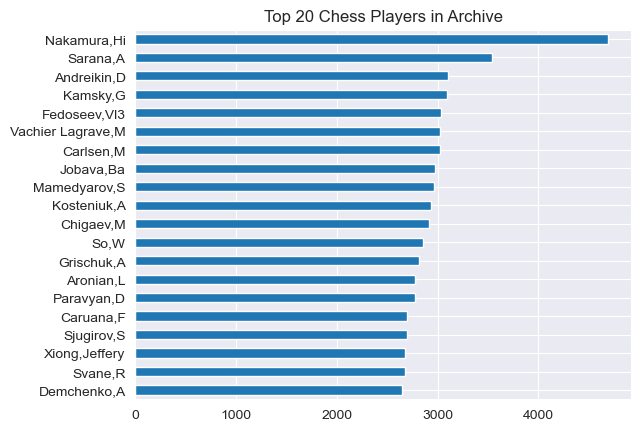

In [13]:
# Viz that displays the players with the most games in this dataset
pd.concat([df['White'], df['Black']]).value_counts(ascending = True).tail(20) \
.plot(kind = 'barh', title = 'Top 20 Chess Players in Archive')
plt.show()

### In the dataset the most games are with Hikaru Nakamura - there is 4462 of his games. 
Second and third positions have Sarana and Fedoseev, the best chess player - Magnus Carslen is 4 with 2857 games. Polish player Jan Krzysztof Duda who games I will analyze is not in the top 30, or even 50. Despite he is considered to be one of the greatest players, he don't play as much as other, more experienced (and maybe more sponsored) players.

In [14]:
# Look on Duda games
players = pd.concat([df['White'], df['Black']]).value_counts()
duda_players = players[players.index == "Duda,J"]
players_ranking = players.rank(method="min", ascending=False)
duda_ranking = players_ranking[players_ranking.index == "Duda,J"].values[0]

# Print the ranking and number of games played by Duda
print("Duda's ranking is:", duda_ranking)
print("Number of games played by Duda:", duda_players.values[0])


Duda's ranking is: 66.0
Number of games played by Duda: 1922


In [15]:
# Create 'Year' column
df['Year'] = df['Date'].dt.year

In [16]:
df['Year'].value_counts()

2021    302821
2022    226051
2020    222454
2019    188684
2018    185948
2017    173480
2016    154090
2015    142254
2013    141688
2014    140822
2012     92912
2011        54
2010         6
2005         1
1988         1
2029         1
Name: Year, dtype: int64

In [17]:
# Choose years between 2013 and 2023
df = df.query('2023 > Year > 2013')

## Opening

In [18]:
# The most played openings
df['Opening'].value_counts().head(20)

Sicilian             282353
French                98139
King's Indian         89424
Queen's pawn game     74300
QGD                   73899
Caro-Kann             72663
Ruy Lopez             71757
English               71003
English opening       48409
Reti opening          44149
Sicilian defence      43795
Reti                  41870
Nimzo-Indian          40509
QGD Slav              34190
Queen's pawn          27153
Gruenfeld             22080
Queen's Indian        21869
Catalan               21357
QGD semi-Slav         19576
Giuoco Piano          17895
Name: Opening, dtype: int64

### The most frequently played opening is Sicilian. 
It's the most popular, but also the most basic opening, which is begins with 1.e4 c5. There can be noticed that in the top ranks is also Sicilian defence, it's particulary the same. Problem with openings data is that, in example, when: 1. e4 c5 then it is Sicilian, but this is divided into variations like: Sicilian alapin, Sicilian Smith-Mora etc. Or there is QGD and also QGD Slav, QGD semi-slav, QGD slav-defence. 
Next positions are: French (also basic, it is just 1.e4 e6) and King's Indian (1.d4 Nf6 2.c4 g6). From top 50 more complex is, for example, Two knights defence (1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6 4.d3)
### This doesn't means that these data are not useful,  but it needs to be careful with analyzing them, because they do not concern the complexity of the position and variations. But there are also columns 'ECO' and 'Variation'.

## Variation

In [19]:
# The most played variations
df['Variation'].value_counts().head(20)

exchange variation                                        36507
advance variation                                         23386
closed                                                    20794
Alapin's variation (2.c3)                                 20013
King's Indian attack                                      18126
classical variation                                       15670
King's Indian attack (Barcza system)                      14806
symmetrical variation                                     12496
Taimanov variation                                        12319
Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) attack       11160
Nimzovich-Rossolimo attack (with ...g6, without ...d6)    10455
4.Nf3                                                     10212
Anderssen variation                                        9754
Najdorf, Byrne (English) attack                            9665
closed, 5.Nf3                                              9482
Nimzovich-Rossolimo attack (without ...d

### There are only variations, without mother-position, so to concanate position with variation I need to use ECO instead of variation or position 


## ECO

### Piece of information about ECO format:
- A-E: Represents the first move played by White. The letters correspond to the following moves: A = 1.e4, B = 1.d4, C = 1.c4, D
= 1.Nf3, E = other first moves (such as 1.f4 or 1.b3).
- 00-99: Represents a specific variation of the opening. The numbers are assigned in a specific order based on the move order
and position of the pieces on the board.

In [20]:
df["ECO"].value_counts().head(20)

A45    42543
D02    30659
B06    26543
B23    26514
B90    26471
A04    26193
A05    25740
B40    24878
A40    23971
B01    23210
B12    22241
A46    22056
A07    21309
A15    21204
A00    21107
D00    20923
B22    20118
C00    19225
C50    18896
B30    16761
Name: ECO, dtype: int64

A45 is for Queen's Pawn Game with 1. d4 Nf6 - so it is not Sicilian! - because this time this values are with variations.<br>
D02 is also Queen's Pawn Game, but with: 1. d4 d5 2. Nf3.<br>
Third B06 is for Robatsch defence: 1. e4 g6.<br>
B23 and B90 are for Sicilian (finally) with variations closed and Najdorf.<br>


In [22]:
# Concatenate Opening and Variation to make column the same as ECO, but with readable strings to analysis
df["OpeningVariation"] = df["Opening"] + ' - ' + df["Variation"].fillna(" - ")
df.loc[df["Variation"].isnull(), "OpeningVariation"] = df["Opening"]

In [23]:
df['OpeningVariation'].value_counts().head(20)

Queen's pawn game                                                    74300
English opening                                                      44756
Reti opening                                                         44149
Sicilian defence                                                     43795
Sicilian - Alapin's variation (2.c3)                                 20013
Caro-Kann - advance variation                                        18471
Sicilian - closed                                                    17792
Giuoco Piano                                                         16121
Trompovsky attack (Ruth, Opovcensky opening)                         15699
Robatsch (modern) defence                                            15658
Sicilian                                                             15657
Reti - King's Indian attack (Barcza system)                          14806
Reti - King's Indian attack                                          12526
English - symmetrical var

## Now OpeningVariation is the same as ECO and is the best solution for analyzing openings.

In [24]:
# Openings group by years
df.groupby(['Year'])['OpeningVariation'].value_counts().head(20)

Year  OpeningVariation                            
2014  Queen's pawn game                               4494
      English opening                                 4035
      Sicilian defence                                3628
      Reti opening                                    3155
      Sicilian - Alapin's variation (2.c3)            1846
      Trompovsky attack (Ruth, Opovcensky opening)    1319
      Sicilian - closed                               1261
      Robatsch (modern) defence                       1256
      Caro-Kann - advance variation                   1195
      Sicilian                                        1148
      Reti - King's Indian attack (Barcza system)     1144
      English - symmetrical variation                 1136
      Sicilian - Taimanov variation                   1018
      Giuoco Piano                                     979
      Sicilian - Najdorf, Byrne (English) attack       908
      Scandinavian (centre counter) defence            884
     

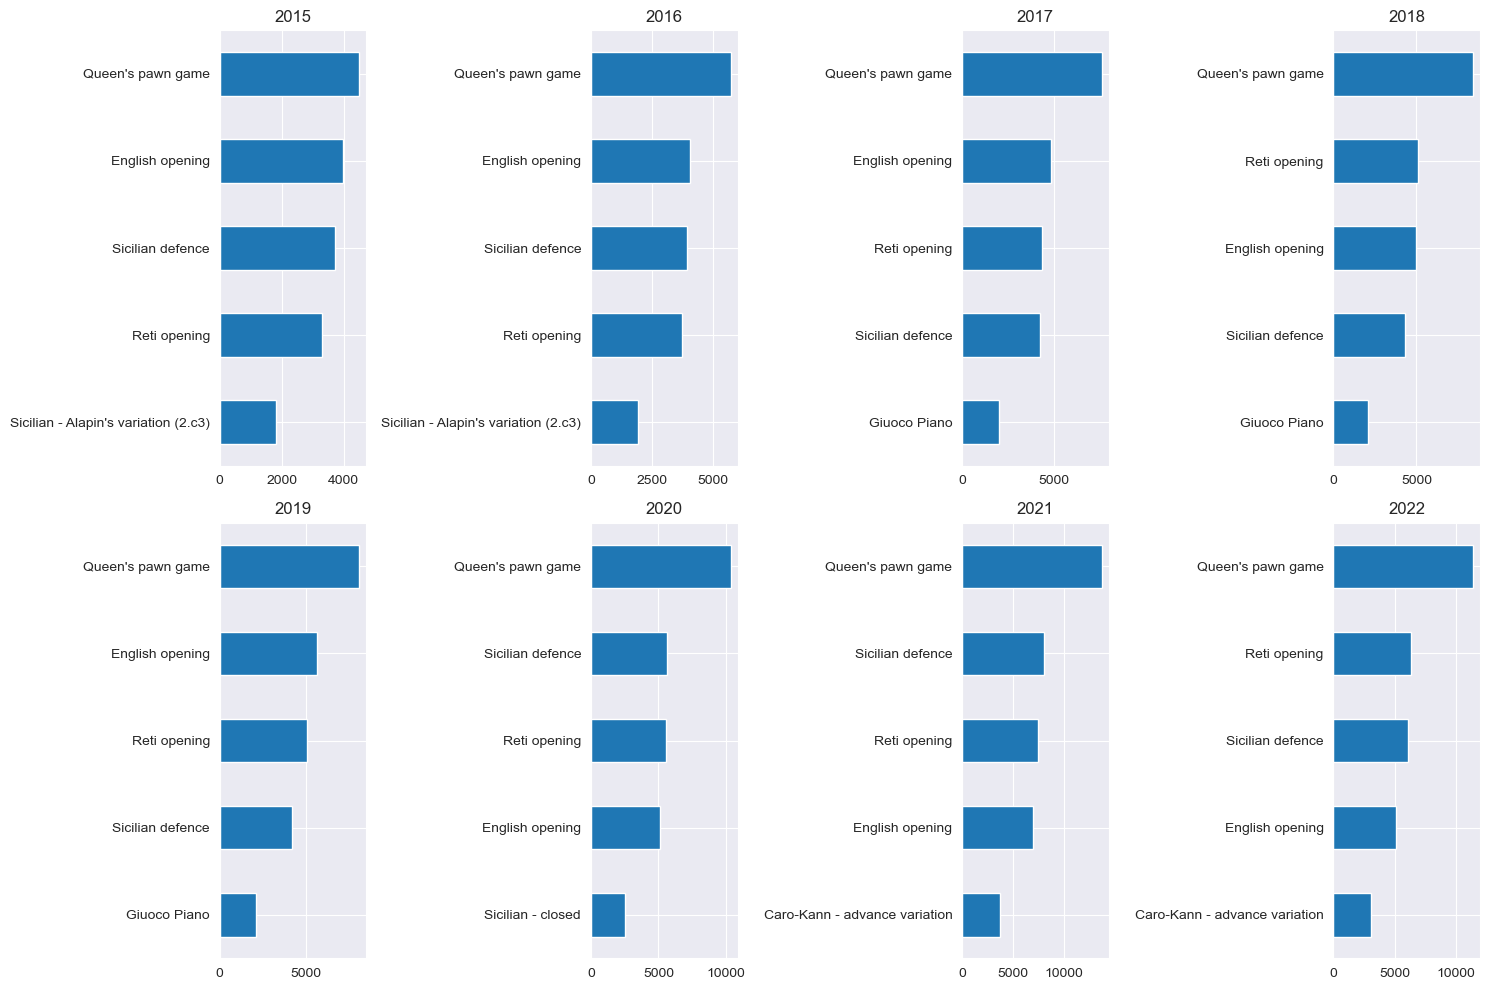

In [25]:
# Plot the most played OpeningVariation by year
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate(range(2015, 2023)):
    df.query("Year == @myyear")['OpeningVariation'].value_counts(ascending=True).tail(5).plot(kind='barh', title=myyear, 
                                                                                              ax=axs[i])

plt.tight_layout()
plt.show()


The most popular in every year is Queen's Pawn game. On next places are: English Opening, Reti opening and Sicilian defence. In the fifth place, the opening changes every year, but we can still see that players usually play similar openings, particularly those saved after one or two moves.

In [26]:
# The most played opening over time
df.groupby(['Year', 'OpeningVariation']).size().groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

Year  OpeningVariation 
2014  Queen's pawn game     4494
2015  Queen's pawn game     4499
2016  Queen's pawn game     5738
2017  Queen's pawn game     7580
2018  Queen's pawn game     8404
2019  Queen's pawn game     8087
2020  Queen's pawn game    10330
2021  Queen's pawn game    13759
2022  Queen's pawn game    11409
dtype: int64

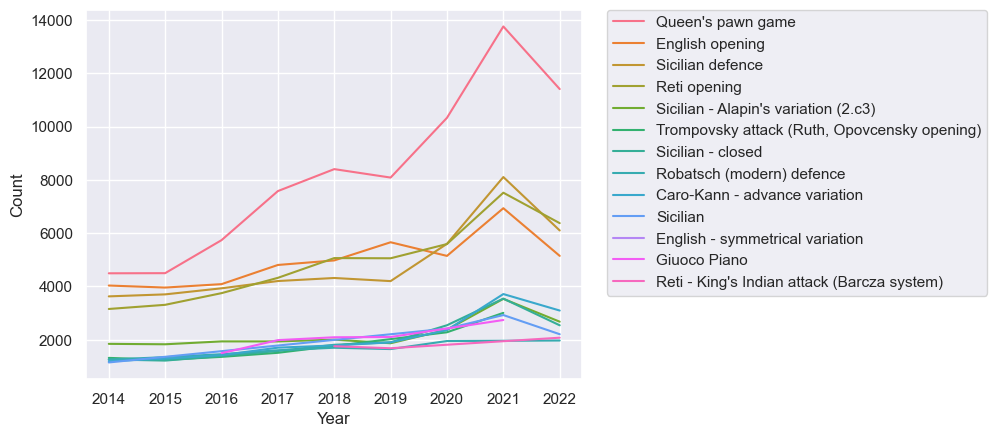

In [29]:
# Create the line plot with TOP 10 Openings over time
counts = df.groupby(['Year', 'OpeningVariation']).size().reset_index(name='Count')
top_openings = counts.sort_values(['Year', 'Count'], ascending=[True, False]).groupby('Year').head(10)

sns.set(style="darkgrid")
sns.lineplot(x="Year", y="Count", hue="OpeningVariation", data=top_openings)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

There is a similar pattern for every opening, which is the result of playing more games year over year.<br>
Sicilian defence stands out a bit - it was played at a similar level from 2014 to 2019, but suddenly grew in popularity in 2020. I think players prefer this opening in shorter games, mostly rapid, so it is more popular in the online era.<br>
The English Opening has shown much smaller growth than the Sicilian in the online period.

### Example how it works on the Ruy Lopez opening by years

In [30]:
# Ruy Lopez as opening (1. e4 e5 2. Nf3 Nc6 3. Bb5)
df.query('Opening == "Ruy Lopez"')['Year'].value_counts()

2021    11375
2020     8921
2022     8862
2019     8103
2018     7863
2017     7459
2016     6817
2015     6577
2014     5780
Name: Year, dtype: int64

In [31]:
# Ruy Lopez as variation (in this situation is 1. e4 e5 2. Nf3 Nc6 3. Bb5 x) x is move that don't belong to any variation
# in Ruy Lopez opening.
df.query('OpeningVariation == "Ruy Lopez"')['Year'].value_counts()

2014    18
2015    12
2018     7
2016     6
2021     6
2019     4
2017     3
2022     2
2020     2
Name: Year, dtype: int64

In [32]:
# OpeningVariation contains Ruy Lopez - so classic Ruy Lopez position and every variant
df['OpeningVariation'] = df['OpeningVariation'].fillna('')
tab1 = df.query('OpeningVariation.str.contains("Ruy Lopez")')['Year'].value_counts()


In [33]:
# Ruy Lopez variants count
df.loc[df['OpeningVariation'].str.contains("Ruy Lopez"), 'OpeningVariation'].value_counts().head(20)

Ruy Lopez - Berlin defence                                          6043
Ruy Lopez - Anderssen variation                                     5052
Ruy Lopez - Berlin defence, open variation                          4749
Ruy Lopez - closed defence                                          3767
Ruy Lopez - 5.O-O                                                   3130
Ruy Lopez - closed, Breyer, Borisenko variation                     2849
Ruy Lopez - fianchetto (Smyslov/Barnes) defence                     1961
Ruy Lopez - closed, Flohr-Zaitsev system (Lenzerheide variation)    1915
Ruy Lopez - Cozio defence                                           1704
Ruy Lopez - closed, anti-Marshall 8.a4                              1568
Ruy Lopez - exchange variation, 5.O-O                               1452
Ruy Lopez - closed, Bogolyubov variation                            1428
Ruy Lopez - Schliemann defence                                      1370
Ruy Lopez - modern Steinitz defence, 5.O-O         

### What about variants?
Ruy Lopez opening is most often played in the Berlin defence variant (1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6), many games are also played in variants: Anderssen, Berlin, but open, closed defence, castling in 5 move and closed Breyer. There are tens of variants in this opening.

### What about years?
The opening is played more and more times every year, but we must remember that covid made that players play a lot more matches, mostly online. We can look at it in two next tables.

In [34]:
# Played games by year
tab2 = df['Year'].value_counts()
tab2

2021    302821
2022    226051
2020    222454
2019    188684
2018    185948
2017    173480
2016    154090
2015    142254
2014    140822
Name: Year, dtype: int64

In [35]:
# Plot Ruy Lopez compared to all games
merged = pd.merge(tab1, tab2, left_index=True, right_index=True)
merged.columns = ['Ruy Lopez', 'Total']
merged['Percentage'] = merged['Ruy Lopez'] / merged['Total'] * 100
merged = merged.sort_index()

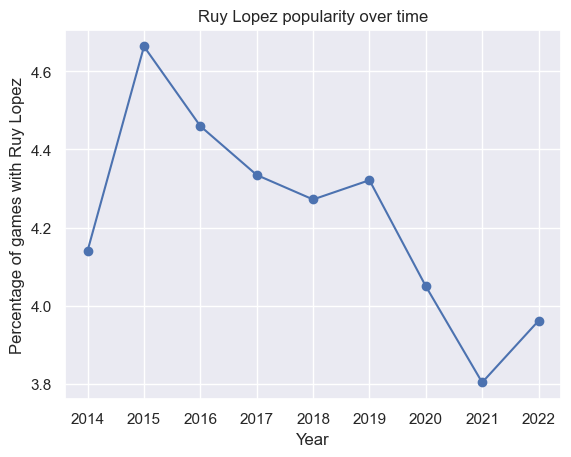

In [36]:
plt.plot(merged['Percentage'], 'o-')

plt.xlabel('Year')
plt.ylabel('Percentage of games with Ruy Lopez')
plt.title('Ruy Lopez popularity over time')

plt.show()

So it can be seen that Ruy Lopez is not more popular in newest years, it's just more games in general. 

I mentioned that the Sicilian Defence has shown a significant growth in recent years. This growth can be plotted similarly to the Ruy Lopez opening.

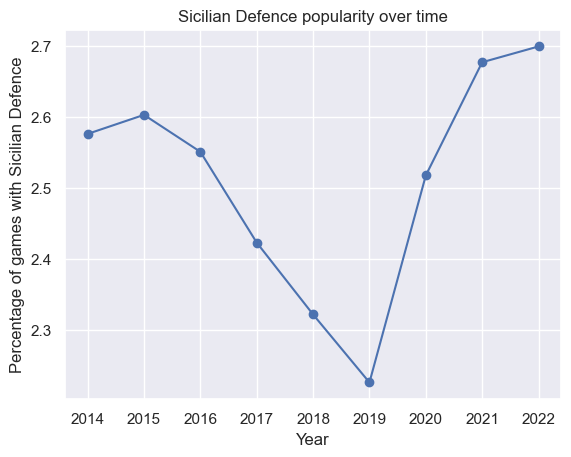

In [39]:
tab3 = df.query('OpeningVariation.str.contains("Sicilian defence")')['Year'].value_counts()
tab4 = df['Year'].value_counts()

merged = pd.merge(tab3, tab4, left_index=True, right_index=True)
merged.columns = ['Sicilian defence', 'Total']
merged['Percentage'] = merged['Sicilian defence'] / merged['Total'] * 100
merged = merged.sort_index()

plt.plot(merged['Percentage'], 'o-')

plt.xlabel('Year')
plt.ylabel('Percentage of games with Sicilian Defence')
plt.title('Sicilian Defence popularity over time')

plt.show()

Sicilian defence growth is clearly visible.

# Jan Krzysztof Duda games analysis

In [44]:
# Starting J.K. Duda analysis
df.loc[df["Black"].str.contains("Duda")].head()

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,Year,OpeningVariation
123,1260,"Huzman,A","Duda,J",2018-12-26,World Rapid 2018,0-1,1. Nf3 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. ...,St Petersburg RUS,False,2.27,A15,English opening,2580,2738,None,GM,GM,2018,English opening
306,1260,Yu Yangyi,"Duda,J",2018-12-26,World Rapid 2018,1-0,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nf3 Nxe4 5. ...,St Petersburg RUS,False,4.8,C42,Petrov,2764,2738,classical attack,GM,GM,2018,Petrov - classical attack
535,1260,"Gareev,T","Duda,J",2018-12-27,World Rapid 2018,0-1,1. g4 d5 2. Bg2 Bxg4 3. c4 d4 4. Bxb7 Nd7 5. B...,St Petersburg RUS,False,6.34,A00,Grob,2569,2738,Romford counter-gambit,GM,GM,2018,Grob - Romford counter-gambit
728,1260,"Frolyanov,D","Duda,J",2018-12-27,World Rapid 2018,0-1,1. e4 d6 2. d4 Nf6 3. Nc3 g6 4. f4 Bg7 5. Bd3 ...,St Petersburg RUS,False,8.25,B09,Pirc,2517,2738,Austrian attack,GM,GM,2018,Pirc - Austrian attack
1016,1260,"Nakamura,Hi","Duda,J",2018-12-28,World Rapid 2018,1/2-1/2,1. Nf3 Nf6 2. b3 b6 3. Bb2 Bb7 4. g3 g6 5. Bg2...,St Petersburg RUS,False,11.10,A05,Reti opening,2746,2738,None,GM,GM,2018,Reti opening


In [45]:
# J.K. Duda the most played openings
df.query('White == "Duda,J" or Black == "Duda,J"')['Opening'].value_counts()

Sicilian                              289
QGD                                   130
English                               116
Ruy Lopez                             108
French                                 75
                                     ... 
Blumenfeld counter-gambit accepted      1
Dzindzikhashvili defence                1
Van't Kruijs opening                    1
Owen defence                            1
Scotch gambit                           1
Name: Opening, Length: 102, dtype: int64

In [47]:
# J.K. Duda the most played openings with variations
df.query('White == "Duda,J" or Black == "Duda,J"')['OpeningVariation'].value_counts().head(20)

Giuoco Piano                                                      43
Queen's pawn game                                                 39
English opening                                                   36
QGD semi-Slav - Stoltz variation                                  33
Sicilian - Najdorf                                                31
Reti opening                                                      30
Ruy Lopez - Berlin defence                                        30
Trompovsky attack (Ruth, Opovcensky opening)                      27
QGD - 4.Nf3                                                       26
Sicilian - Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) attack    26
Sicilian - Najdorf, Adams attack                                  25
Reti - King's Indian attack (Barcza system)                       24
Petrov - classical attack                                         23
Ruy Lopez - Berlin defence, open variation                        23
QGD - Ragozin variation           

He plays the most often Giuoco Piano (1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5; it is type of Italian Opening, in italian language means: "quiet game").<br>
He plays a lot Queen's pan game and English opening (like everybody else).<br>
In the top 20 there are also some variants of two openings I mentioned earlier: Sicilian (three variants of Najdorf and Canal-Sokolsky) and Ruy Lopez in two variations of Berlin Defence.<br>
It seems like he prefers to play d4 as first more often than e4.<br>

In [48]:
# Make column with Duda, Duda as white pieces and Duda as black pieces
df_duda = df.query('White == "Duda,J" or Black == "Duda,J"')
duda_white = df.query('White == "Duda,J"')
duda_black = df.query('Black == "Duda,J"')

In [49]:
df_duda.shape

(1729, 19)

In this dataset there are 1729 his games.

### Plot the most played openings in Duda games by year

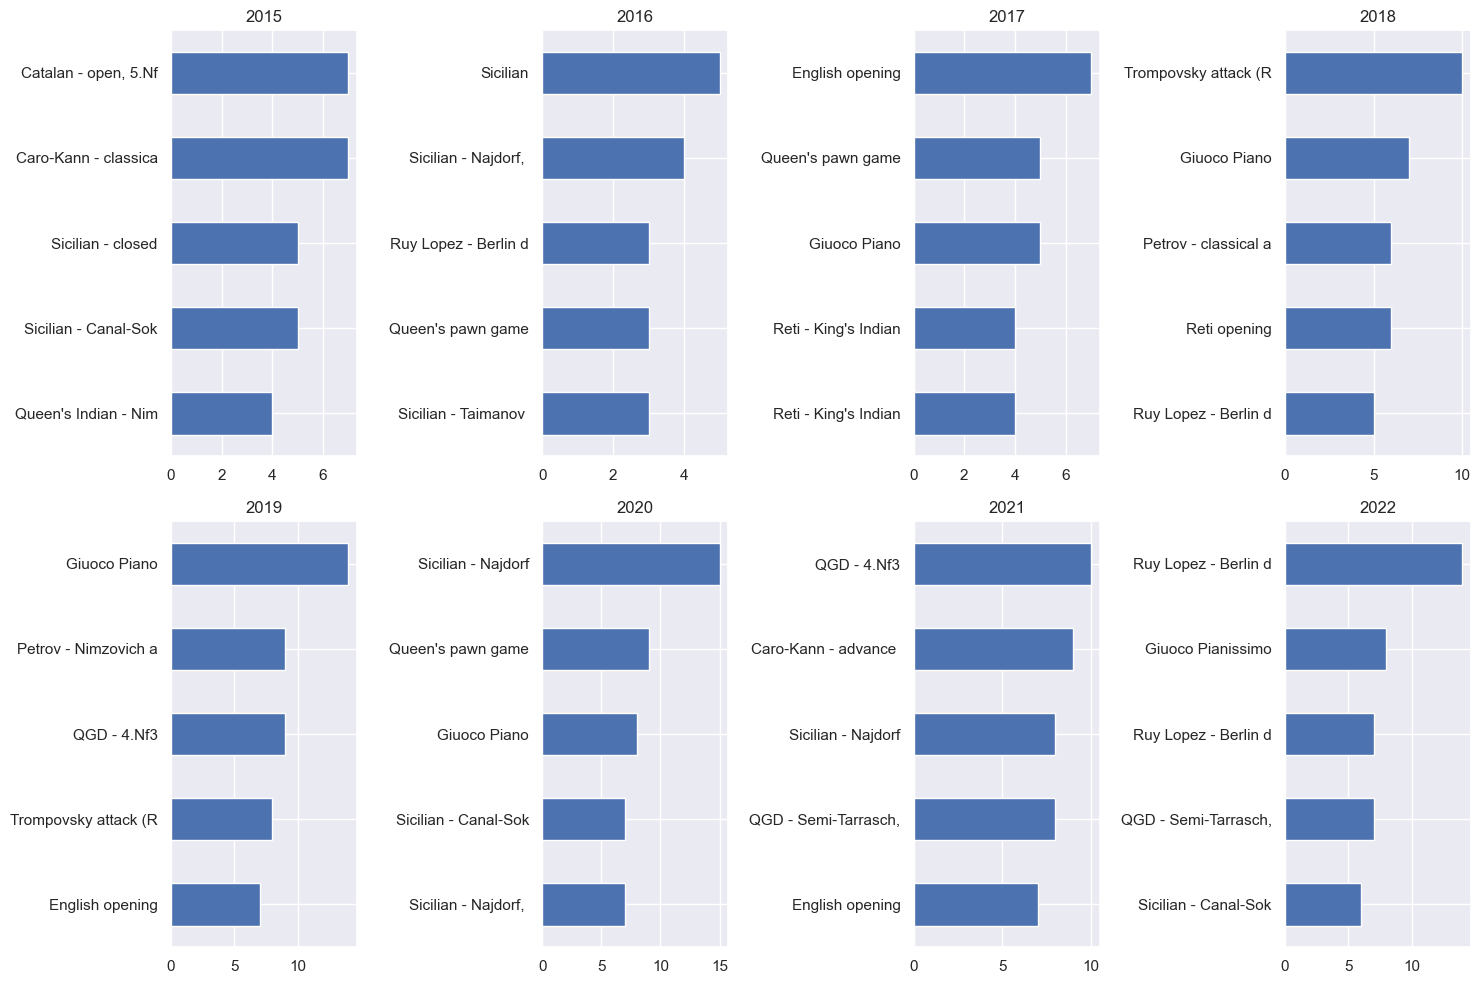

In [70]:
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    variation_counts = df_duda.query("Year == @myyear")['OpeningVariation'].value_counts(ascending=True).tail(5)
    variation_counts.index = variation_counts.index.str[:20]
    variation_counts.plot(kind='barh', title=myyear, ax=axs[i])

plt.tight_layout()
plt.show()

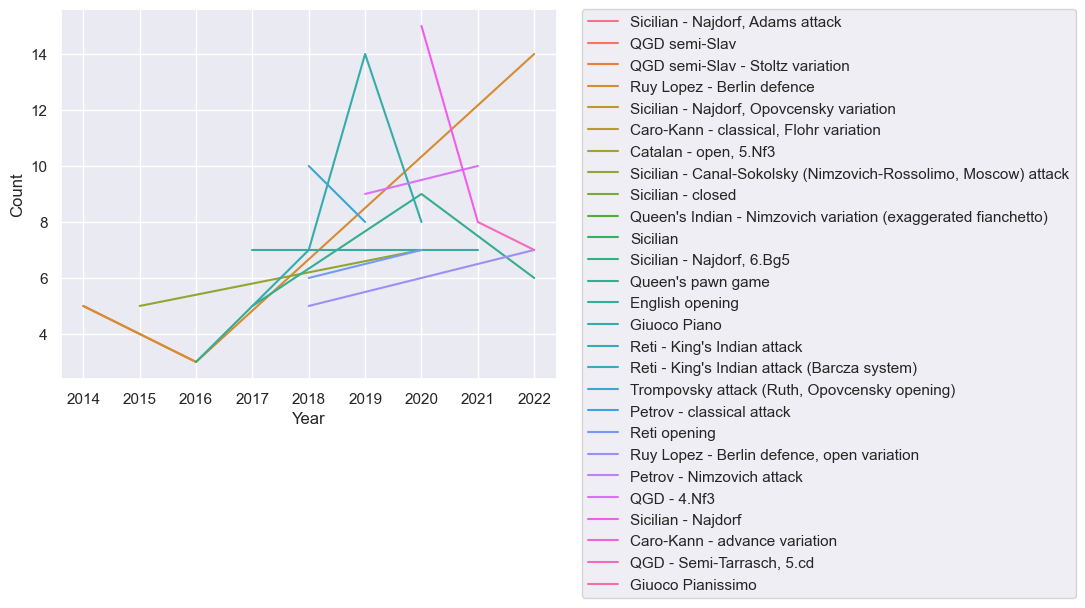

In [71]:
# Create the line plot with top Duda Openings over time
counts = df_duda.groupby(['Year', 'OpeningVariation']).size().reset_index(name='Count')
top_openings = counts.sort_values(['Year', 'Count'], ascending=[True, False]).groupby('Year').head(5)

sns.set(style="darkgrid")
sns.lineplot(x="Year", y="Count", hue="OpeningVariation", data=top_openings)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Second one plot is not clear, so it's worth focusing on the first one.<br>
He changes openings a lot. In 2015 his favourite was Catalan - open, but it wasn't even in top 5 in the next years.<br>
It is also not a very reliable chart because the most frequently played openings until 2019 do not even exceed 10. IN 2019 this barieer exceeded only Giuoco Piano and in next year it was played 8 times.<br>
The most frequently openings played in Duda games in 2020, 2021 and 2022 were (in sequence):Sicilian - Najdorf, Queen's Pawn Game with 4. Nf3 and Ruy Lopez Berlin - the last one against the trends. Other Variant of Ruy Lopez Berlin is also on third place in 2022.

### The most played openings in Duda games with white pieces

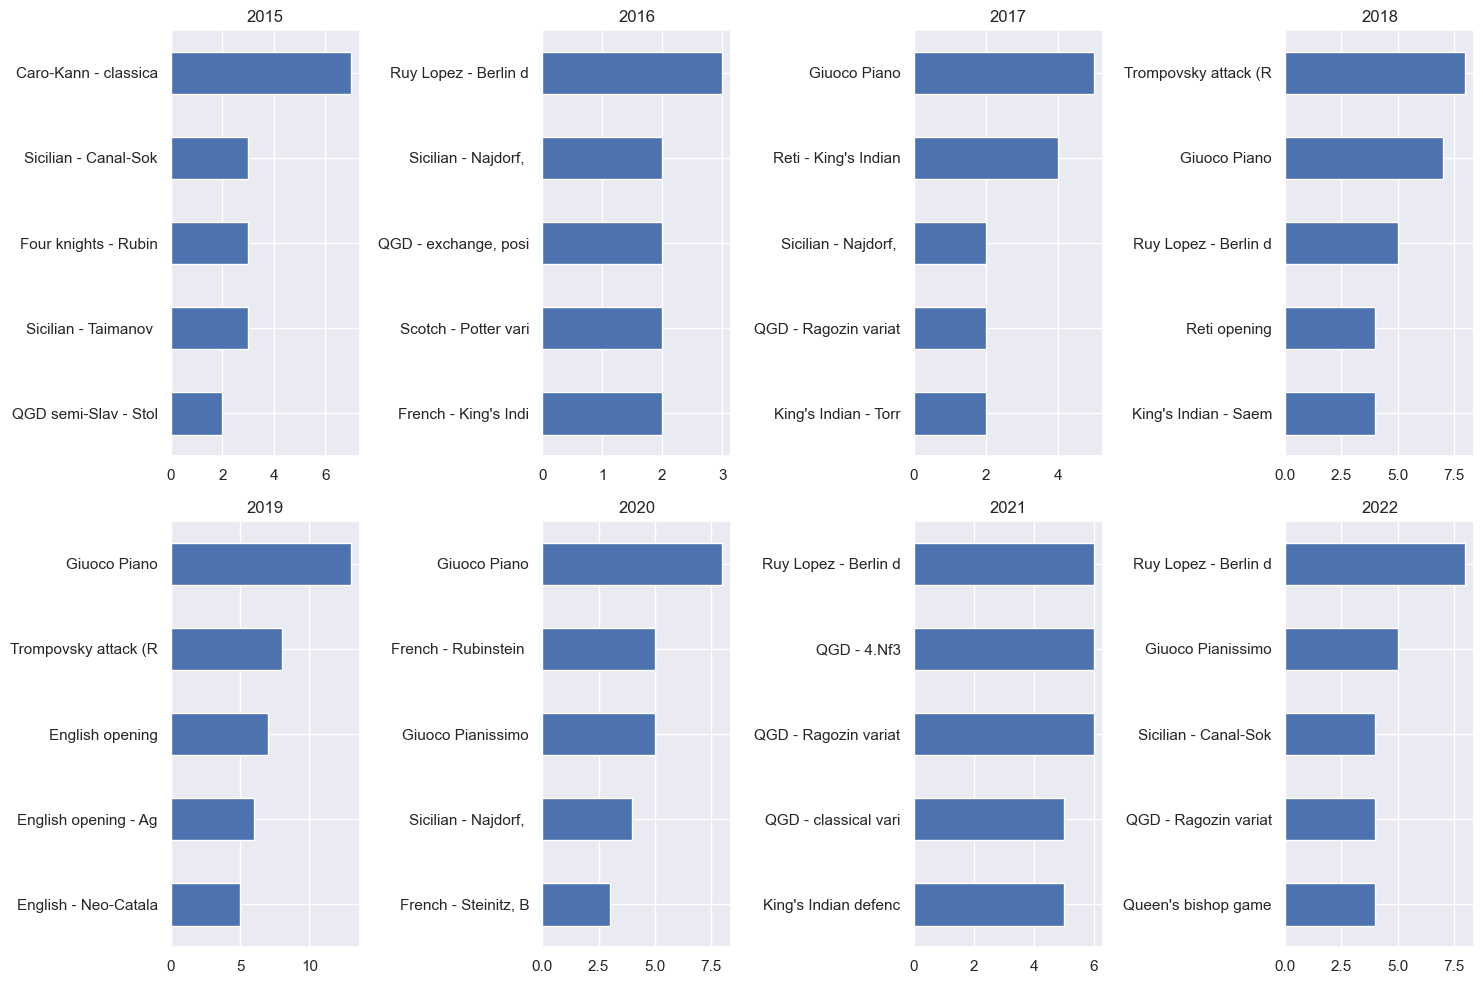

In [75]:
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    variation_counts = duda_white.query("Year == @myyear")['OpeningVariation'].value_counts(ascending=True).tail(5)
    variation_counts.index = variation_counts.index.str[:20]
    variation_counts.plot(kind='barh', title=myyear, ax=axs[i])

plt.tight_layout()
plt.show()

### The most played openings in Duda games with black pieces

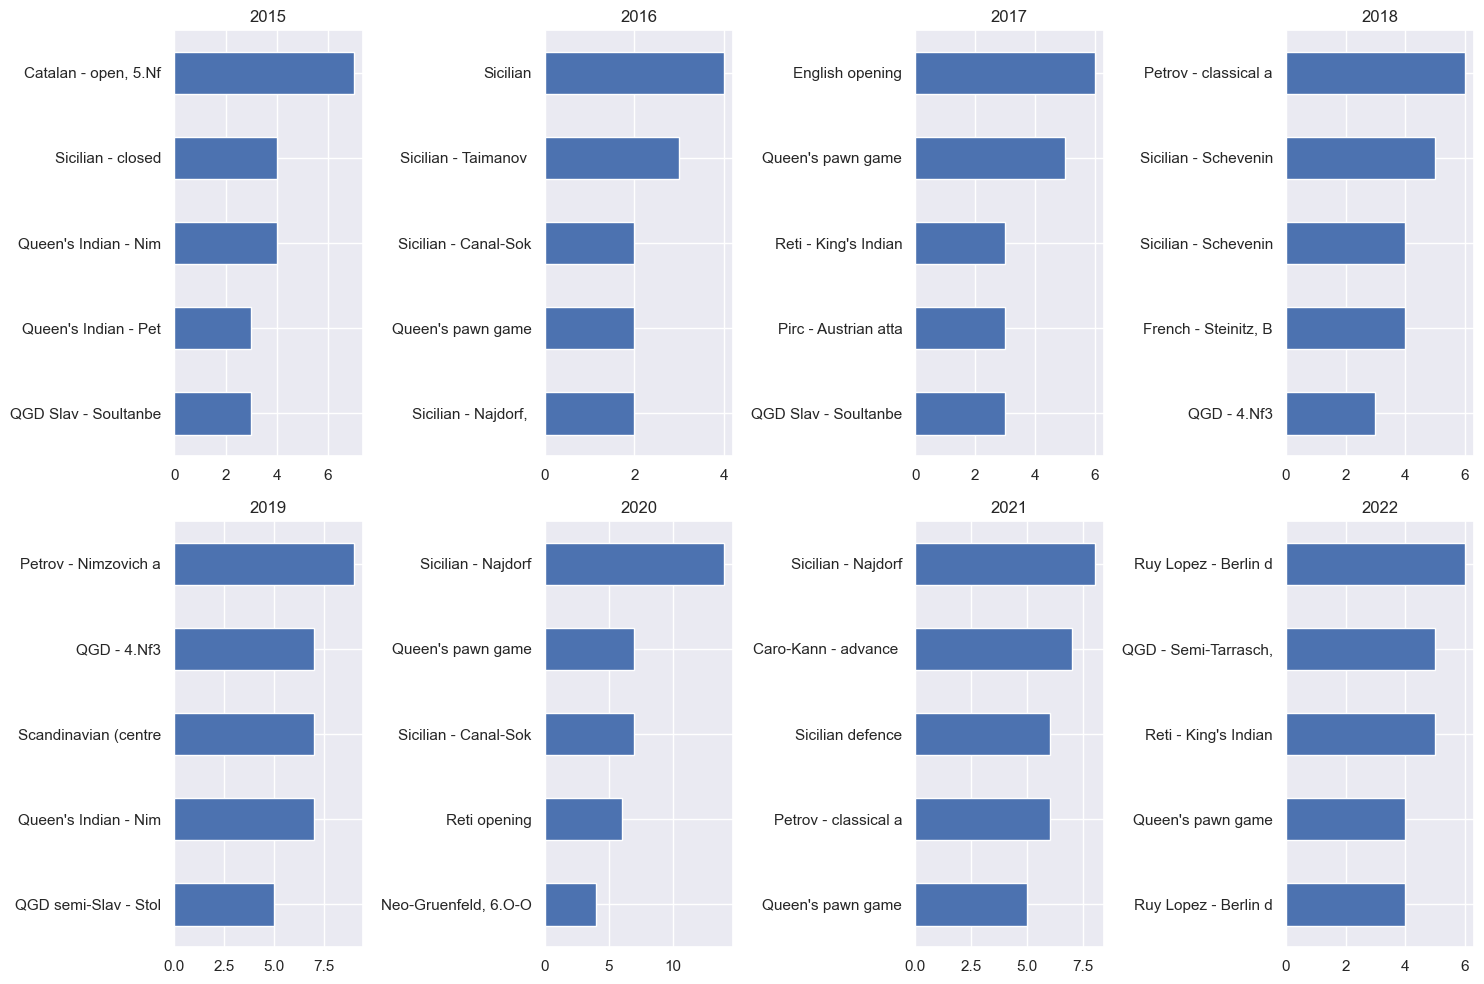

In [76]:
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
axs = axs.flatten()
for i, myyear in enumerate (range (2015, 2023)):
    variation_counts = duda_black.query("Year == @myyear")['OpeningVariation'].value_counts(ascending=True).tail(5)
    variation_counts.index = variation_counts.index.str[:20]
    variation_counts.plot(kind='barh', title=myyear, ax=axs[i])

plt.tight_layout()
plt.show()

### Create column with rating differences and results in Duda games 


In [78]:
d_results = (
    df_duda.dropna(subset = ["BlackElo", "WhiteElo"])
    .astype({"BlackElo": "int", "WhiteElo": "int"})
    .copy())
d_results["Elo_diff"] = d_results["BlackElo"] - d_results["WhiteElo"]

In [79]:
d_results.head()

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,Year,OpeningVariation,Elo_diff
123,1260,"Huzman,A","Duda,J",2018-12-26,World Rapid 2018,0-1,1. Nf3 Nf6 2. c4 g6 3. Nc3 d5 4. cxd5 Nxd5 5. ...,St Petersburg RUS,False,2.27,A15,English opening,2580,2738,None,GM,GM,2018,English opening,158
201,1260,"Duda,J",Wang Hao,2018-12-26,World Rapid 2018,1/2-1/2,1. Nf3 d5 2. c4 e6 3. e3 Nf6 4. b3 b6 5. Bb2 B...,St Petersburg RUS,False,3.5,A13,English opening,2738,2730,Agincourt variation,GM,GM,2018,English opening - Agincourt variation,-8
306,1260,Yu Yangyi,"Duda,J",2018-12-26,World Rapid 2018,1-0,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nf3 Nxe4 5. ...,St Petersburg RUS,False,4.8,C42,Petrov,2764,2738,classical attack,GM,GM,2018,Petrov - classical attack,-26
430,1260,"Duda,J","Miton,K",2018-12-26,World Rapid 2018,1/2-1/2,1. d4 Nf6 2. Bg5 e6 3. e4 h6 4. Bxf6 Qxf6 5. c...,St Petersburg RUS,False,5.30,A45,"Trompovsky attack (Ruth, Opovcensky opening)",2738,2588,None,GM,GM,2018,"Trompovsky attack (Ruth, Opovcensky opening)",-150
535,1260,"Gareev,T","Duda,J",2018-12-27,World Rapid 2018,0-1,1. g4 d5 2. Bg2 Bxg4 3. c4 d4 4. Bxb7 Nd7 5. B...,St Petersburg RUS,False,6.34,A00,Grob,2569,2738,Romford counter-gambit,GM,GM,2018,Grob - Romford counter-gambit,169


### Look at games results - how many times Duda lose, draw or win

In [86]:
d_results.shape

(1728, 20)

In [87]:
d_results.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')").shape

(705, 20)

In [88]:
d_results.query("(White == 'Duda,J' and Result == '1/2-1/2') or (Black == 'Duda,J' and Result == '1/2-1/2')").shape

(611, 20)

In [89]:
print(705 / 1728)
print(611/1728)
print((1728-705-611)/1728)

0.4079861111111111
0.35358796296296297
0.23842592592592593


### Duda won 41% of games, draw 35% and lose 24%

In [90]:
# Create boolean column 'WhiteIsRatedHigher' to check ELO differences between players
d_results["WhiteIsRatedHigher"] = d_results["WhiteElo"] > d_results["BlackElo"]

In [91]:
d_results.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')").shape

(367, 21)

In [92]:
d_results.query("(WhiteIsRatedHigher and Result == '1-0') or (not WhiteIsRatedHigher and Result == '0-1')").shape

(750, 21)

In [93]:
d_results.shape

(1728, 21)

In [96]:
print(367 / 1728)
print(750 / 1728)
print((1728 - 750 - 367)/1728)

0.21238425925925927
0.4340277777777778
0.35358796296296297


### 21% of Duda games were won by lower rating player and 43% by higher rating player.


### Plot: difference between ratings in Duda games

<AxesSubplot:title={'center':'Difference between Ratings'}, ylabel='Frequency'>

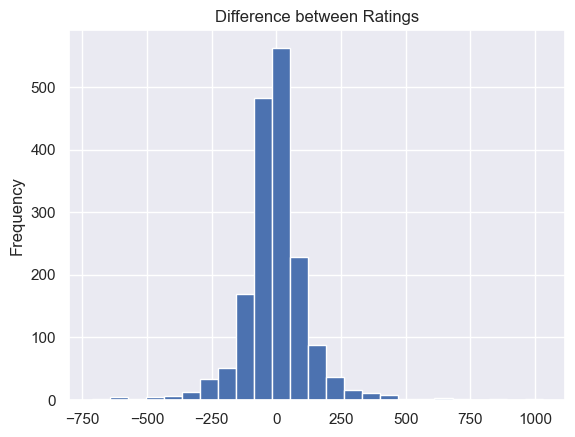

In [97]:
d_results["Elo_diff"].plot(kind = "hist", bins = 25, title = "Difference between Ratings")

It can be seen that is similar to normal distribution. In global results should be even more similar.

<AxesSubplot:title={'center':'Global difference between Ratings'}, ylabel='Frequency'>

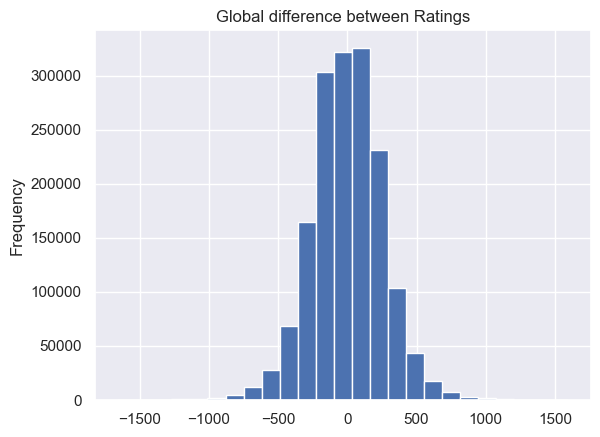

In [98]:
results = (
    df.dropna(subset = ["BlackElo", "WhiteElo"])
    .astype({"BlackElo": "int", "WhiteElo": "int"})
    .copy())
results["Elo_diff"] = results["BlackElo"] - results["WhiteElo"]
results = results.drop(1662955).copy() # One match have ELO difference = 1662955, it's obvious missmatching
results["Elo_diff"].plot(kind = "hist", bins = 25, title = "Global difference between Ratings")

Yup, still like normal distribution

### In Duda games usually there are small rating differences, about -100 to 100, but there are also games with +500 rating difference. 
### It's worth looking at the matches with the biggest difference.

In [107]:
# These queries can be useful in pgn analysis of his games, for now I use columns with a bit differences
win_query = d_results.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')")
lose_query = d_results.query("(White == 'Duda,J' and Result == '0-1') or (Black == 'Duda,J' and Result == '1-0')")

In [108]:
duda_lose_query = d_results.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')")

In [109]:
duda_lose_query["Elo_diff_abs"] = duda_lose_query["Elo_diff"].abs()

In [110]:
duda_lose_query.query("(White == 'Duda,J' and Result == '0-1') or (Black == 'Duda,J' and Result == '1-0')").sort_values("Elo_diff_abs", ascending = False)

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,Year,OpeningVariation,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
1174470,1217,"Psyk,Radoslaw","Duda,J",2018-03-03,TCh-POL Rapid 2018,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,Zgierz POL,False,5.25,C88,Ruy Lopez,2313,2724,"closed, anti-Marshall 8.a4",None,GM,2018,"Ruy Lopez - closed, anti-Marshall 8.a4",411,False,411
1174555,1217,"Duda,J","Lewtak,Da",2018-03-03,TCh-POL Rapid 2018,0-1,1. d4 Nf6 2. Nf3 d6 3. c4 Nbd7 4. Nc3 e5 5. d5...,Zgierz POL,False,8.17,A46,Queen's pawn game,2724,2370,None,GM,None,2018,Queen's pawn game,-354,True,354
1542838,1448,"Duda,J","Paragua,M",2022-08-05,44th Olympiad 2022,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Chennai IND,False,7.13,B90,Sicilian,2750,2461,"Najdorf, Adams attack",GM,GM,2022,"Sicilian - Najdorf, Adams attack",-289,True,289
197779,1415,"Duda,J","Klekowski,M",2021-12-17,European Blitz 2021,0-1,1. d4 Nf6 2. Nf3 e6 3. Bg5 d5 4. e3 Be7 5. Nbd...,Katowice POL,False,19.1,A46,Queen's pawn,2760,2479,Torre attack,GM,GM,2021,Queen's pawn - Torre attack,-281,True,281
197957,1415,"Duda,J","Schneider,Il",2021-12-17,European Blitz 2021,0-1,1. e4 Nc6 2. Nf3 f5 3. exf5 d5 4. Bb5 Bxf5 5. ...,Katowice POL,False,22.1,B00,KP,2760,2479,Colorado counter,GM,IM,2021,KP - Colorado counter,-281,True,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91964,1270,"Harikrishna,P","Duda,J",2019-03-08,1st Prague Masters 2019,1-0,1. e4 c5 2. Nf3 Nc6 3. Nc3 Nf6 4. Bb5 Qc7 5. O...,Prague CZE,False,3.5,B30,Sicilian defence,2730,2731,None,GM,GM,2019,Sicilian defence,1,False,1
358142,1093,"Safarli,E","Duda,J",2015-10-14,World Blitz 2015,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Berlin GER,False,21.36,B90,Sicilian,2657,2658,"Najdorf, Byrne (English) attack",GM,GM,2015,"Sicilian - Najdorf, Byrne (English) attack",1,False,1
1523021,1333,"Karjakin,Sergey","Duda,J",2020-05-19,Lindores Abbey Prelim,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,chess24.com INT,True,4.2,B97,Sicilian,2752,2753,"Najdorf, Poisoned pawn variation",GM,GM,2020,"Sicilian - Najdorf, Poisoned pawn variation",1,False,1
2649,1260,"Svidler,P","Duda,J",2018-12-29,World Blitz 2018,1-0,1. Nf3 Nf6 2. c4 e6 3. e3 d5 4. b3 Be7 5. Bb2 ...,St Petersburg RUS,False,5.6,A15,English opening,2737,2738,None,GM,GM,2018,English opening,1,False,1


Biggest difference when Duda lost was 411 with polish player Radosław Psyk and the biggest when Duda was white was with Damian Lewtak - 354 ELO diffrence.
### What about wins?

In [111]:
duda_win_query = d_results.query("(WhiteIsRatedHigher and Result == '1-0') or (not WhiteIsRatedHigher and Result == '0-1')")
duda_win_query["Elo_diff_abs"] = duda_win_query["Elo_diff"].abs()
duda_win_query.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')").sort_values("Elo_diff_abs", ascending = False)

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,Year,OpeningVariation,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
1703562,1157,"Paziewski,M","Duda,J",2017-01-08,ch-POL Rapid 2017,0-1,1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. f3 O-O 5. a3 ...,Zgierz POL,False,1.2,E20,Nimzo-Indian,1655,2684,Kmoch variation,None,GM,2017,Nimzo-Indian - Kmoch variation,1029,False,1029
1562129,1206,"Vambute,Dana","Duda,J",2017-12-16,European Rapid 2017,0-1,1. d4 Nf6 2. Bf4 d6 3. e3 g6 4. Nf3 Bg7 5. Be2...,Katowice POL,False,1.10,A45,Queen's pawn game,1879,2717,None,None,GM,2017,Queen's pawn game,838,False,838
196978,1415,"Adamczyk,Zuzanna","Duda,J",2021-12-17,European Blitz 2021,0-1,1. d4 Nf6 2. c4 e6 3. g3 c5 4. d5 exd5 5. cxd5...,Katowice POL,False,2.1,A62,Benoni,2047,2760,fianchetto variation,WCM,GM,2021,Benoni - fianchetto variation,713,False,713
196921,1415,"Duda,J","Adamczyk,Zuzanna",2021-12-17,European Blitz 2021,1-0,1. e4 c6 2. Nf3 d5 3. Nc3 dxe4 4. Nxe4 Nf6 5. ...,Katowice POL,False,1.1,B10,Caro-Kann,2760,2047,two knights variation,GM,WCM,2021,Caro-Kann - two knights variation,-713,True,713
1703586,1157,"Duda,J","Delega,T",2017-01-08,ch-POL Rapid 2017,1-0,1. d4 e6 2. c4 f5 3. g3 Bb4+ 4. Nd2 Nf6 5. Bg2...,Zgierz POL,False,2.2,A84,Dutch defence,2684,2004,None,GM,CM,2017,Dutch defence,-680,True,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892069,1237,"Duda,J","Wojtaszek,R",2018-07-17,46th GM 2018,1-0,1. d4 Nf6 2. Bg5 d5 3. Bxf6 gxf6 4. c4 dxc4 5....,Dortmund GER,False,3.4,A45,"Trompovsky attack (Ruth, Opovcensky opening)",2737,2733,None,GM,GM,2018,"Trompovsky attack (Ruth, Opovcensky opening)",-4,True,4
825442,1076,"Duda,J","Cordova,E",2015-06-16,50th Capablanca Mem Prem,1-0,1. e4 c6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Bf5 5. N...,Havana CUB,False,2.4,B18,Caro-Kann,2610,2609,"classical, Flohr variation",GM,GM,2015,"Caro-Kann - classical, Flohr variation",-1,True,1
1414,1260,"Duda,J","Svidler,P",2018-12-28,World Rapid 2018,1-0,1. c4 e5 2. Nc3 Nc6 3. Nf3 Nf6 4. e3 Bb4 5. Qc...,St Petersburg RUS,False,15.8,A28,English,2738,2737,"four knights, Romanishin variation",GM,GM,2018,"English - four knights, Romanishin variation",-1,True,1
192966,1347,"Anand,V","Duda,J",2020-08-29,Online Olym KO Stage 2020,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,chess.com INT,True,3.11,B90,Sicilian,2753,2753,Najdorf,GM,GM,2020,Sicilian - Najdorf,0,False,0


Biggest ELO differences in Duda won matches was with M. Paziewski. Duda had 2684 ELO (as black) and white had 1655 ELO - 1029 ELO difference.

### And biggest ELO difference when Duda won with players who have higher rating

In [113]:
duda_win_query = d_results.query("(WhiteIsRatedHigher and Result == '0-1') or (not WhiteIsRatedHigher and Result == '1-0')")
duda_win_query["Elo_diff_abs"] = duda_win_query["Elo_diff"].abs()
duda_win_query.query("(White == 'Duda,J' and Result == '1-0') or (Black == 'Duda,J' and Result == '0-1')").sort_values("Elo_diff_abs", ascending = False)

,twic_number,White,Black,Date,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,Year,OpeningVariation,Elo_diff,WhiteIsRatedHigher,Elo_diff_abs
716574,1009,"Khismatullin,D","Duda,J",2014-03-06,15th ch-EUR Indiv 2014,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,Yerevan ARM,False,4.23,B90,Sicilian,2714,2563,"Najdorf, Adams attack",GM,GM,2014,"Sicilian - Najdorf, Adams attack",-151,True,151
1843228,1051,"Duda,J","Vitiugov,N",2014-12-20,European Rapid 2014,1-0,1. e4 e6 2. d4 d5 3. Nc3 Bb4 4. e5 c5 5. a3 Bx...,Wroclaw POL,False,6.6,C19,French,2603,2738,"Winawer, advance, poisoned pawn, Konstantinopo...",GM,GM,2014,"French - Winawer, advance, poisoned pawn, Kons...",135,False,135
1962057,1450,"Carlsen,M","Duda,J",2022-08-19,FTX Crypto Cup 2022,0-1,1. b3 Nf6 2. Bb2 d5 3. e3 Bf5 4. Bxf6 gxf6 5. ...,Miami USA,False,5.5,A01,Nimzovich-Larsen attack,2864,2740,Indian variation,GM,GM,2022,Nimzovich-Larsen attack - Indian variation,-124,True,124
1962058,1450,"Duda,J","Carlsen,M",2022-08-19,FTX Crypto Cup 2022,1-0,1. d4 Nf6 2. Bg5 e6 3. e4 h6 4. Bxf6 Qxf6 5. c...,Miami USA,False,5.6,A45,"Trompovsky attack (Ruth, Opovcensky opening)",2740,2864,None,GM,GM,2022,"Trompovsky attack (Ruth, Opovcensky opening)",124,False,124
1843556,1051,"Duda,J","Navara,D",2014-12-21,European Rapid 2014,1-0,1. e4 c6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Bf5 5. N...,Wroclaw POL,False,11.3,B18,Caro-Kann,2603,2727,"classical, Flohr variation",GM,GM,2014,"Caro-Kann - classical, Flohr variation",124,False,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876252,1382,Wei Yi,"Duda,J",2021-05-01,Shenzhen Evening Blitz,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,chess.com INT,True,3.1,B90,Sicilian,2732,2729,"Najdorf, Byrne (English) attack",GM,GM,2021,"Sicilian - Najdorf, Byrne (English) attack",-3,True,3
876240,1382,Wei Yi,"Duda,J",2021-04-29,Shenzhen Evening Rapid,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,chess.com INT,True,3.1,B90,Sicilian,2732,2729,"Najdorf, Byrne (English) attack",GM,GM,2021,"Sicilian - Najdorf, Byrne (English) attack",-3,True,3
1792276,1012,"Markowski,T","Duda,J",2014-03-28,ch-POL 2014,0-1,1. d4 Nf6 2. Nf3 d5 3. c4 e6 4. e3 c6 5. Nbd2 ...,Warsaw POL,False,4.2,D30,QGD Slav,2566,2563,None,GM,GM,2014,QGD Slav,-3,True,3
184526,1437,"Duda,J","Anand,V",2022-05-23,Superbet Blitz 2022,1-0,1. e4 e5 2. Nf3 Nf6 3. d4 Nxe4 4. Bd3 d5 5. Nx...,Warsaw POL,False,10.3,C43,Petrov,2750,2751,"modern attack, Symmetrical variation",GM,GM,2022,"Petrov - modern attack, Symmetrical variation",1,False,1


The biggest Duda win was with D. Khismatullin in 2014. Duda had 2563 ELO with black and opponent 2714 ELO - 151 ELO difference.<br>
There are also two matches with Carlsen(!). Duda always had a way with him. Difference between them in two Duda victories with biggest upset were 124 ELO. They were in two different rounds in FTX Crypto Cup 2022 in Miami.<br>

## Now I want to analyze four of the previously mentioned games - with Damian Lewtak, Radosław Psyk and two with Magnus Carlsen.

In [114]:
# Library to analyze chess pgns
import chess.pgn

In [115]:
# Pull the PGN file of the game with Radosław Psyk
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1217.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "TCh-POL Rapid 2018") & (game.headers["Round"] == "5.25"):
            if game.headers["Black"] == "Duda,J":
                break

In [116]:
game.headers

Headers(Event='TCh-POL Rapid 2018', Site='Zgierz POL', Date='2018.03.03', Round='5.25', White='Psyk,Radoslaw', Black='Duda,J', Result='1-0', BlackElo='2724', BlackFideId='1170546', BlackTeam='MKS MOS Wieliczka', BlackTitle='GM', ECO='C88', EventDate='2018.03.03', EventType='rapid', Opening='Ruy Lopez', Variation='closed, anti-Marshall 8.a4', WhiteElo='2313', WhiteFideId='1182838', WhiteTeam='KSz PiÄ…tka Skierniewice')

Game was played in event TCh-POL Rapid 2018 in Zgierz. It means The Week In Chess Poland Edition. It was rapid game. Played opening was Ruy Lopez, closed, anti-Marshall variation (1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 Nf6 5.O-O Be7 6.Re1 b5 7.Bb3 O-O 8.a4)

In [117]:
game.mainline_moves()

<Mainline at 0x256ea18a040 (1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-O Be7 6. Re1 b5 7. Bb3 O-O 8. a4 b4 9. c3 Rb8 10. d4 d6 11. h3 Bb7 12. Nbd2 Qd7 13. Nf1 h6 14. Ng3 Rfe8 15. Bc2 Bf8 16. Nf5 Ba8 17. N3h4 bxc3 18. bxc3 exd4 19. Qf3 Ne5 20. Qg3 d3 21. Bxh6 Ng6 22. Bxd3 Kh7 23. Bg5 Nxe4 24. Bxe4 Bxe4 25. Nxg6 fxg6 26. Qh4+ Kg8 27. Rxe4 Rxe4 28. Qxe4 gxf5 29. Qd5+ Qf7 30. Qf3 Rb2 31. Re1 d5 32. Qf4 Bc5 33. Bh4 c6 34. Qe5 Kh7 35. Qf4 Rc2 36. Qf3 a5 37. Qd3 Rb2 38. Bg3 g6 39. Bh4 Ra2 40. Qg3 Rxa4 41. Bg5 Ra2 42. Qh4+ Kg8 43. Rf1 a4 44. Kh1 a3 45. Bf6 Qh7 46. Qa4 Rxf2 47. Re1 Qf7 48. Qh4 Qh7 49. Re8+ Bf8 50. Rxf8+ Kxf8 51. Qxh7 a2 52. Qg7+ Ke8 53. Qe7#)>

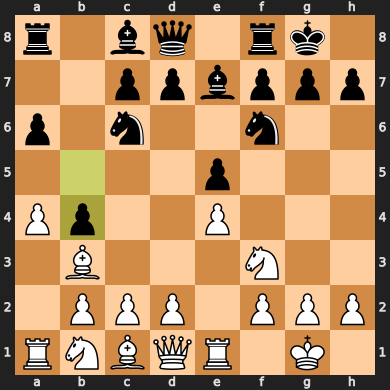

In [119]:
# exemplary arrangement of figures on the board (at the 16 move - end of debiut)
board = chess.Board()
for ply, move in enumerate(game.mainline_moves()):
    board.push(move)
    if ply == 15:
        break
board

In [120]:
# Install stockfish chess engine
!pip install stockfish

In [121]:
STOCKFISH_PATH = (r"C:\Users\sebas\Downloads\stockfish_15.1_win_x64_avx2\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe")
from stockfish import Stockfish
from tqdm.notebook import tqdm

stockfish = Stockfish(
    path = STOCKFISH_PATH,
    depth = 18,
    parameters = {"Threads": 32, "Minimum Thinking Time": 5},)

In [122]:
# Loop over the game, each move to end
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/105 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Game evaluation'}>

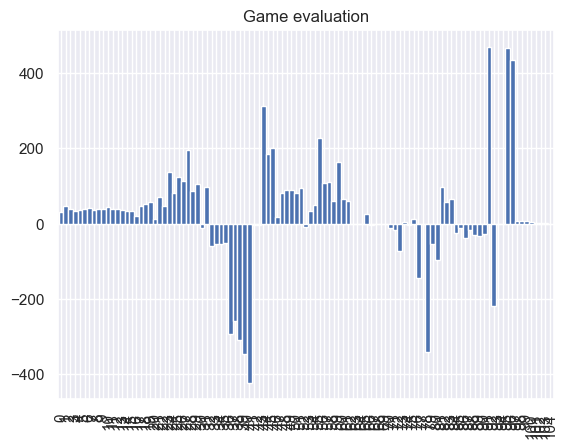

In [123]:
# Evaluation of Duda - Psyk game
pd.DataFrame(results)["value"].plot(kind = 'bar', width = 1, title = "Game evaluation")

In [130]:
# Pull the PGN file of game with Damian Lewtak
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1217.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "TCh-POL Rapid 2018") & (game.headers["Round"] == "8.17"):
            if game.headers["White"] == "Duda,J":
                break

In [131]:
game.headers

Headers(Event='TCh-POL Rapid 2018', Site='Zgierz POL', Date='2018.03.03', Round='8.17', White='Duda,J', Black='Lewtak,Da', Result='0-1', BlackElo='2370', BlackFideId='1141724', BlackTeam='GOSTMAT Gostynin', ECO='A46', EventDate='2018.03.03', EventType='rapid', Opening="Queen's pawn game", WhiteElo='2724', WhiteFideId='1170546', WhiteTeam='MKS MOS Wieliczka', WhiteTitle='GM')

This game was also in TCh-POL Rapid 2018 in 8.17 round. Duda played white. It was played in Queen's pawn game.

In [125]:
# Loop over the game, each move to end
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/116 [00:00<?, ?it/s]

<AxesSubplot:title={'center':'Game evaluation'}>

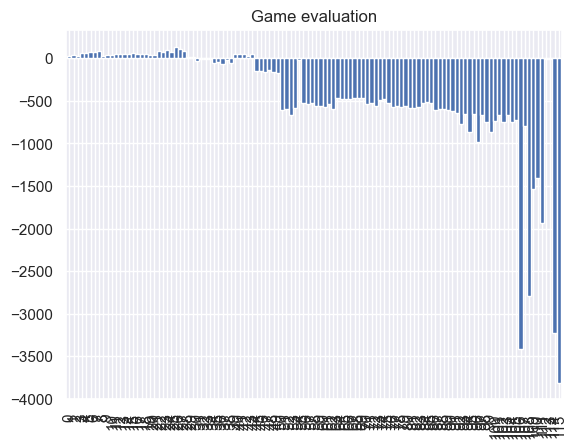

In [126]:
# Evaluation of Duda - Lewtak game
pd.DataFrame(results)["value"].plot(kind = 'bar', width = 1, title = "Game evaluation")

### In game with Psyk Duda had moments of advantage. This was rapid game with many mistakes. Two in the end (about 95 move) were crucial and Psyk didn't lose the advantage and won. 
### In game with Lewtak was equal begining, even to about 40 move, but then Duda make mistake, and second mistake and Lewtak had advantage which keep till the end, but it takes 116 moves to complete advantage.

In [145]:
# Pull the PGN file of the game with Magnus Carlsen
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1450.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "FTX Crypto Cup 2022") & (game.headers["Round"] == "5.5"):
            if game.headers["Black"] == "Duda,J":
                break

In [146]:
game.headers

Headers(Event='FTX Crypto Cup 2022', Site='Miami USA', Date='2022.08.19', Round='5.5', White='Carlsen,M', Black='Duda,J', Result='0-1', BlackElo='2740', BlackFideId='1170546', BlackTitle='GM', ECO='A01', EventDate='2022.08.15', Opening='Nimzovich-Larsen attack', Variation='Indian variation', WhiteElo='2864', WhiteFideId='1503014', WhiteTitle='GM')

It was FTX Crypto Cup 2022 event in Miami. Round 5.5 (it means round 5 and 5 game between players/teams etc.). Opening was Nimzovich-Larsen attack, Indian variation. Duda as black.

In [147]:
# Loop over the game, each move to end
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/86 [00:00<?, ?it/s]

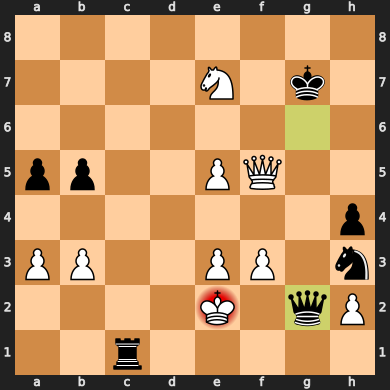

In [154]:
# Last move
board = chess.Board()
for ply, move in enumerate(game.mainline_moves()):
    board.push(move)
    if ply == 85:
        break
board

<AxesSubplot:title={'center':'Game evaluation'}>

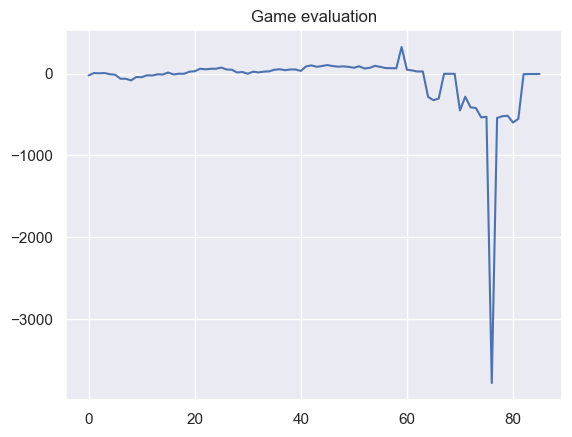

In [148]:
# Evaluation of Carlsen - Duda game
pd.DataFrame(results)["value"].plot.line(title = "Game evaluation")

In [155]:
# Pull the PGN file of the game with Magnus Carlsen
with open (r'C:\Users\sebas\Downloads\archive (9)\pgns\twic1450.pgn') as f:
    for _ in range(1_000_000):
        game = chess.pgn.read_game(f)
        if (game.headers["Event"] == "FTX Crypto Cup 2022") & (game.headers["Round"] == "5.6"):
            if game.headers["White"] == "Duda,J":
                break

In [156]:
game.headers

Headers(Event='FTX Crypto Cup 2022', Site='Miami USA', Date='2022.08.19', Round='5.6', White='Duda,J', Black='Carlsen,M', Result='1-0', BlackElo='2864', BlackFideId='1503014', BlackTitle='GM', ECO='A45', EventDate='2022.08.15', Opening='Trompovsky attack (Ruth, Opovcensky opening)', WhiteElo='2740', WhiteFideId='1170546', WhiteTitle='GM')

The same event and next match in the same round. Opening was Trompovsky attack (Ruck, Opovcensky opening(1.d4 Nf6 2.Bg5)) Duda as white.

In [157]:
# Loop over the game, each move to end
results = []
board = chess.Board()
ply_length = len([x for x in game.mainline_moves()])
for ply, move in tqdm(enumerate(game.mainline_moves()), total = ply_length):
    board.push(move)
    stockfish.set_fen_position(board.fen())
    evaluation = stockfish.get_evaluation()
    results.append(evaluation)

  0%|          | 0/105 [00:00<?, ?it/s]

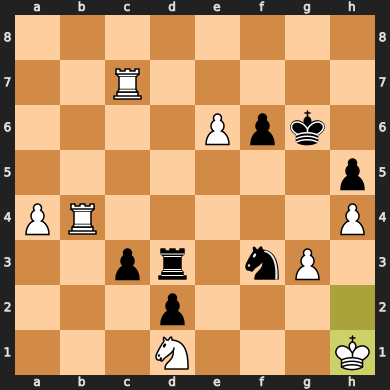

In [160]:
board = chess.Board()
for ply, move in enumerate(game.mainline_moves()):
    board.push(move)
    if ply == 104:
        break
board

<AxesSubplot:title={'center':'Game evaluation'}>

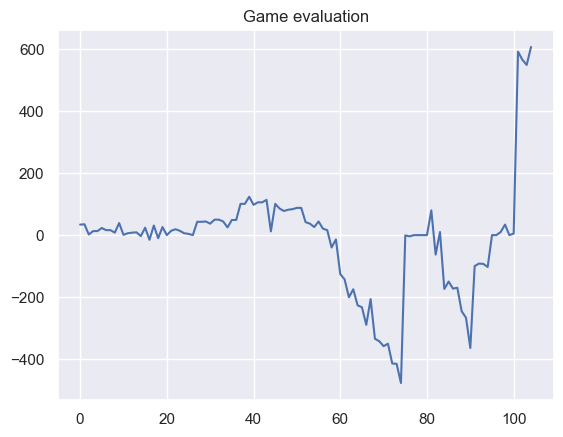

In [161]:
# Evaluation of Carlsen - Duda game
pd.DataFrame(results)["value"].plot.line(title = "Game evaluation")

First game with Carlsen was probably won by time. Position is about equal, but it was chance for mate for Duda.<br>
Second game, Duda with white, was won by Duda, Carlsen resign in lost position (Carlsen without rook and Duda with free pawn).